<h1 align="center">Machine Learning</h1><h2 align="center" style="margin:10px">Assignment</h2>

In [1]:
# Import all necessary libraries here
%matplotlib inline
import warnings; warnings.simplefilter('ignore')
import numpy as np
from scipy.io import loadmat
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, ward, average, complete, single, fcluster
from sklearn.metrics import adjusted_rand_score
import matplotlib.pyplot as plt
from sklearn import utils
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

ImportError: DLL load failed: The specified procedure could not be found.

# Exercise 3: Cluster Analysis

For this exercise we are returning to the MNIST data, and we are exploring several clustering techniques with it.

#### a) Perform k-means clustering with k=10 on this dataset.

In [2]:
mnist = loadmat('mnist-original')
mnist_data = mnist["data"].T
mnist_labels = mnist["label"][0]

Let's plot the label distribution in the MNIST dataset to get an idea of how many images should belong to each cluster.

In [3]:
def plot_label_distribution(digits, counts):
    plt.figure(figsize=(10, 6))
    plt.bar(digits, counts)
    plt.xlabel("Digits")
    plt.ylabel("Number Of Occurrences")
    plt.title("MNIST Digits Distribution")
    plt.show()

In [4]:
digits, counts = np.unique(mnist_labels, return_counts=True)
plot_label_distribution(digits, counts)

NameError: name 'plt' is not defined

In [5]:
kmeans = KMeans(n_clusters=10, n_jobs=10, random_state=42).fit(mnist_data)

NameError: name 'KMeans' is not defined

In [6]:
print("Cluster memberships: {}".format(kmeans.labels_))
print("Unique Labels: {}".format(np.unique(kmeans.labels_)))

Cluster memberships: [4 4 3 ... 1 1 1]
Unique Labels: [0 1 2 3 4 5 6 7 8 9]


As we asked for ten clusters, the clusters are numbered from 0 to 9.

We can try to plot the label distribution obtained with K-means to see how the digit distribution differs from the first plot.

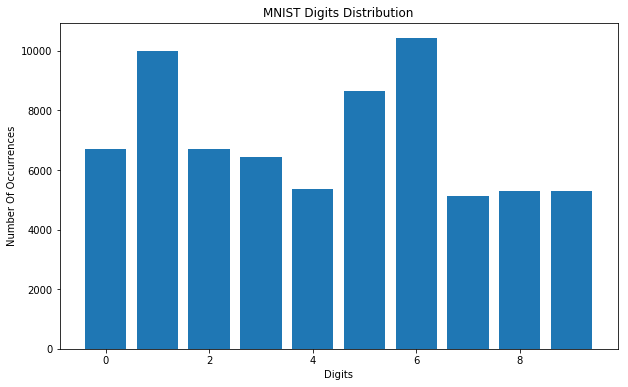

In [7]:
digits, counts = np.unique(kmeans.labels_, return_counts=True)
plot_label_distribution(digits, counts)

As we can see the label distribution is very different from the intial label distribution plot.

#### b) Using visualization techniques analogous to what we have done in the Clustering notebook for the faces data, can you determine the 'nature' of the 10 constructed clusters?

#### Do the clusters (roughly) coincide with the 10 different actual digits?

In [8]:
def plot_cluster_centers(cluster_centers, labels):
    fig, axes = plt.subplots(2, 5, figsize=(20,8))
    for ax, cc, i in zip (axes.ravel(), cluster_centers, np.arange(axes.ravel().size)):
        ax.set_title("idx: {}, size: {}".format(i, len(np.where(labels == i)[0])))
        ax.imshow(cc.reshape(28, 28))
    plt.show()    

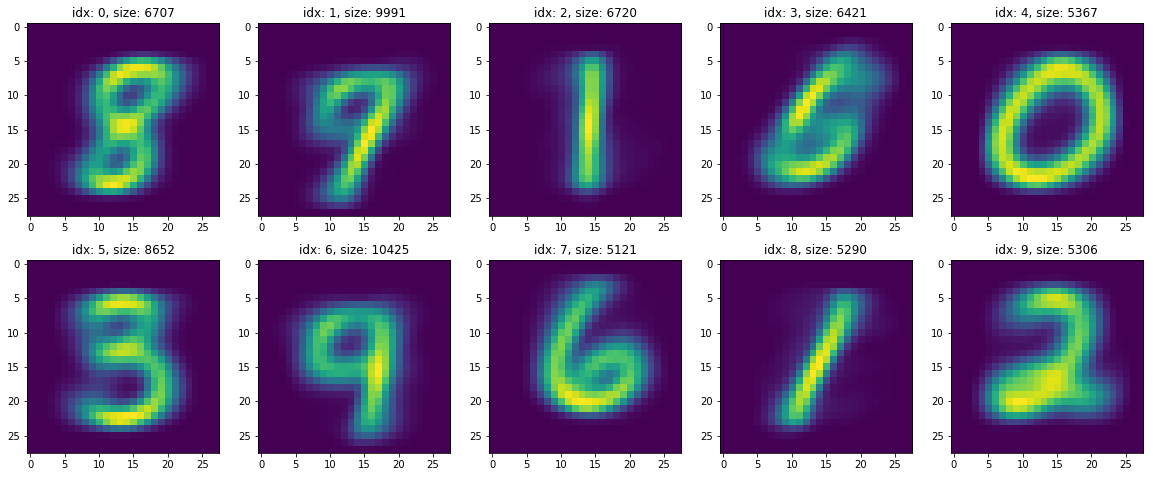

In [9]:
plot_cluster_centers(kmeans.cluster_centers_, kmeans.labels_)

Yes, we are able to determine the nature of the 10 constructed clusters. K-Means was able to almost perfectly recover the true labels. The centroids for digit 4 and 9 are quite similar so we are not able to prefectly distinguish which one is which, and the centroid for digit 7 is not represented 100% correctly.

#### c) Perform a supervised clustering evaluation using adjusted rand index. Are the results stable, when you perform several random restarts of k-means?

In [10]:
print("ARI score when random_state=42: {:2f}".format(adjusted_rand_score(mnist_labels, kmeans.labels_)))

ARI score when random_state=42: 0.365764


We evaluated the performance of the K-Means algorithm on the MNIST data set, using the ARI score and we can see that the performance was not that good, only 36,6%.

We will check if the results are stable by changing the `random_state`

ARI score when random_state=0: 0.365239


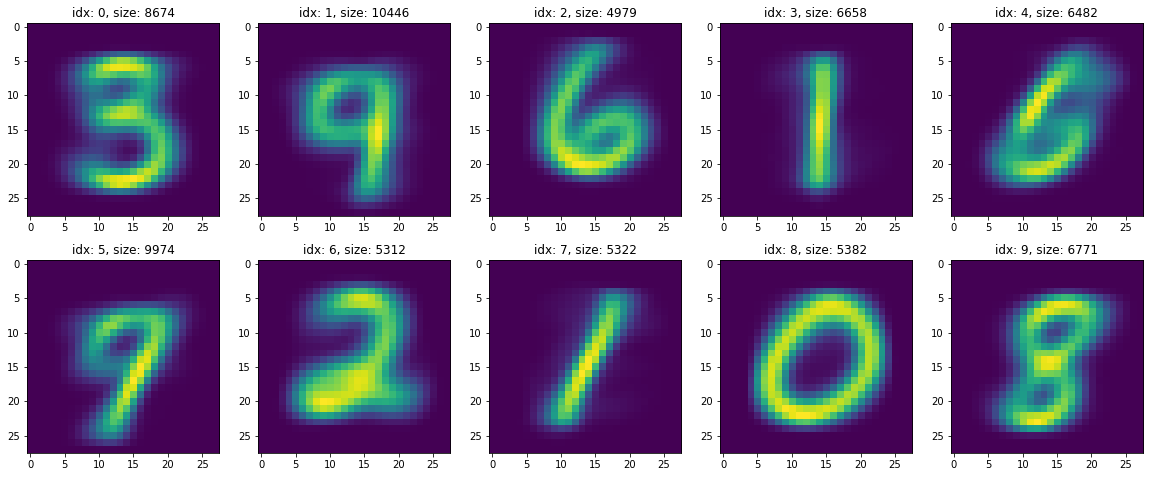

In [11]:
kmeans = KMeans(n_clusters=10, n_jobs=10, random_state=0).fit(mnist_data)
print("ARI score when random_state=0: {:2f}".format(adjusted_rand_score(mnist_labels, kmeans.labels_)))
plot_cluster_centers(kmeans.cluster_centers_, kmeans.labels_)

ARI score when random_state=10: 0.366661


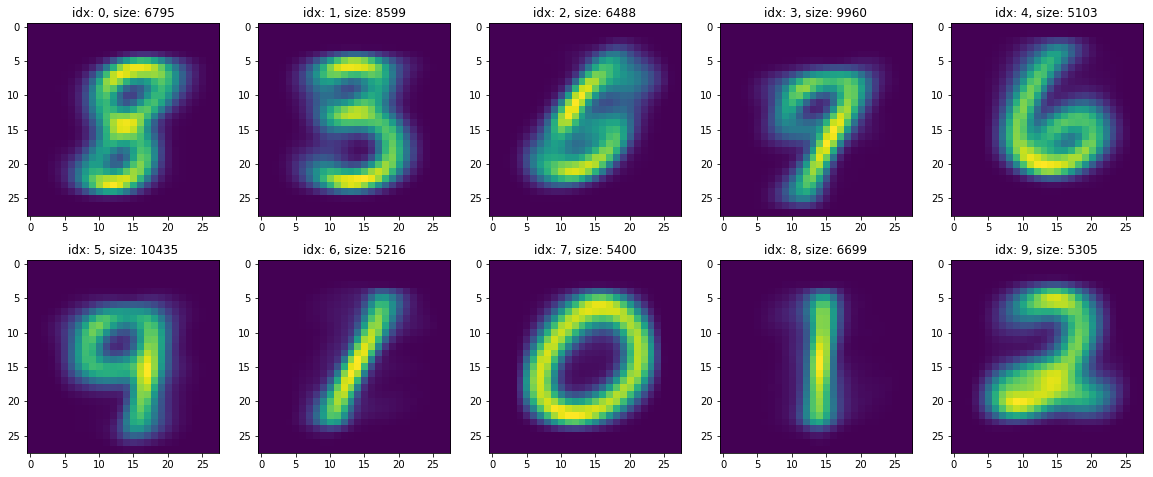

In [12]:
#change random state to evaluate if the results are stable
kmeans = KMeans(n_clusters=10, n_jobs=10, random_state=10).fit(mnist_data)
print("ARI score when random_state=10: {:2f}".format(adjusted_rand_score(mnist_labels, kmeans.labels_)))
plot_cluster_centers(kmeans.cluster_centers_, kmeans.labels_)

The results are stable even if the random state changes.

#### d) Now perform hierarchical clustering on the data. (in order to improve visibility in the constructed dendrograms, you can also use a much reduced dataset as constructed using sklearn.utils.resample shown below).
#### Does the visual analysis of the dendrogram indicate a natural number of clusters?

To improve the visibility of the dendrograms we will onky use 200 samples from the original dataset.

In [13]:
small_mnist_data, small_mnist_label = utils.resample(mnist_data, mnist_labels, n_samples=200, replace='false')

In [3]:
ward_linkage_array = ward(small_mnist_data)

plt.figure(figsize=(20, 9))
dendrogram(ward_linkage_array)
plt.show()

NameError: name 'ward' is not defined

The dendogram doesn't indicate a natural number of clusters using ward as a distance metric.

#### e) Using different cluster distance metrics (ward,single,average, etc.), what do the clusterings look like that are produced at the level of k=10 clusters?
#### See the Clustering notebook for the needed Python code, including the fcluster method to retrieve 'plain' clusterings from the hierarchical clustering. 

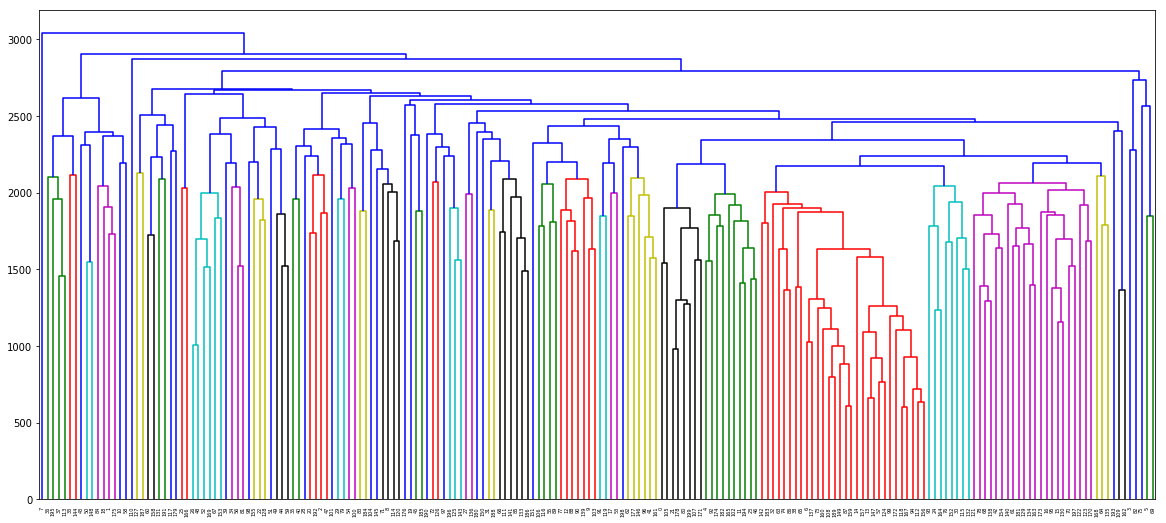

In [15]:
average_linkage_array = average(small_mnist_data)

plt.figure(figsize=(20, 9))
dendrogram(average_linkage_array)
plt.show()

In [16]:
average_flat_cluster = fcluster(average_linkage_array, t=9, criterion='distance')
cluster, count = np.unique(average_flat_cluster, return_counts=True)
cluster, count

(array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
         27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
         40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
         53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
         66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
         79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
         92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
        105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
        118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
        131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
        144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
        157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
        170, 171, 172, 173, 174, 175, 176, 177, 178

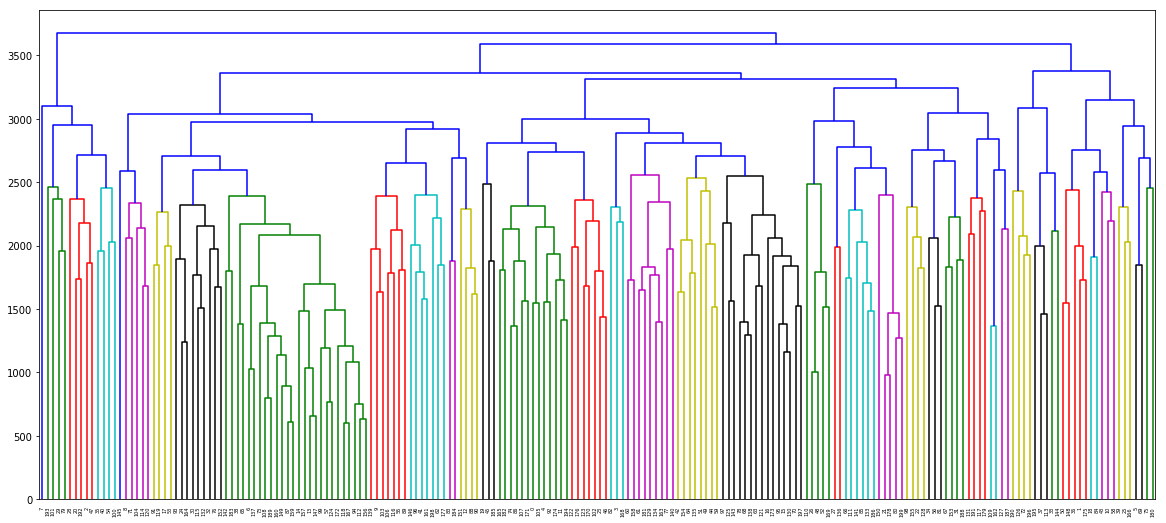

In [17]:
complete_linkage_array = complete(small_mnist_data)

plt.figure(figsize=(20, 9))
dendrogram(complete_linkage_array)
plt.show()

In [18]:
complete_flat_cluster = fcluster(complete_linkage_array, t=9, criterion='distance')
cluster, count = np.unique(complete_flat_cluster, return_counts=True)
cluster, count

(array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
         27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
         40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
         53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
         66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
         79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
         92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
        105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
        118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
        131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
        144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
        157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
        170, 171, 172, 173, 174, 175, 176, 177, 178

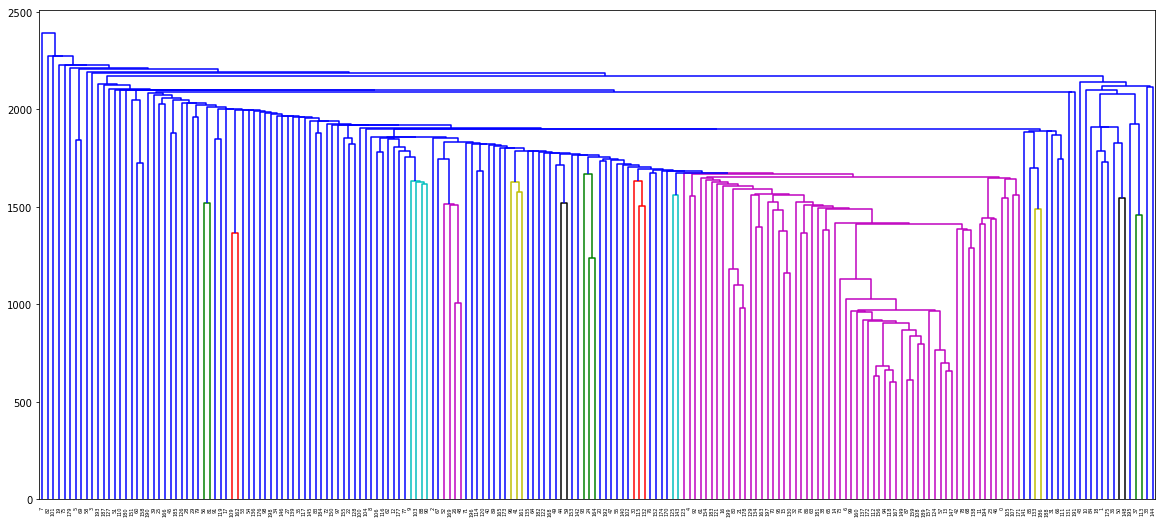

In [19]:
single_linkage_array = single(small_mnist_data)

plt.figure(figsize=(20,9))
dendrogram(single_linkage_array)
plt.show()

In [20]:
flat_clusters = fcluster(single_linkage_array, t=9, criterion='distance')
cluster, count = np.unique(flat_clusters, return_counts=True)
cluster, count

(array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
         27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
         40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
         53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
         66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
         79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
         92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
        105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
        118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
        131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
        144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
        157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
        170, 171, 172, 173, 174, 175, 176, 177, 178

#### f) Do a DBSCAN clustering of the small dataset. Tweak the different parameters.

In order to perform a better DBSCAN analysis, we will increase the size of the `small_mnist_label` used in section (e) by creating a new reduced data from the origin dataset with 7000 data points.

In [21]:
small_mnist_data, small_mnist_labels = utils.resample(mnist_data, mnist_labels, n_samples=7000, replace='false')

In [22]:
# apply DBSCAN with default parameters
dbscan = DBSCAN()
clusters = dbscan.fit_predict(small_mnist_data)
print("Cluster memberships:\n{}".format(clusters))
print("ARI score: {}".format(adjusted_rand_score(small_mnist_labels, dbscan.labels_)))

Cluster memberships:
[-1 -1 -1 ... -1 -1 -1]
ARI score: 0.0


All data points were assigned the label `-1`, which stands for noise and we get a score of 0. This is a consequence of the default parameter settings for `eps` and `min_samples`. We will try to scale the data to ensure the features have similar ranges and maybe it will be easier to find a good setting for `eps`.

In [23]:
# rescale the data to zero mean and unit variance
scaler = StandardScaler()
scaler.fit(small_mnist_data)
X_scaled = scaler.transform(small_mnist_data)

In [24]:
def calculate_best_parameters(data, labels):
    best_eps = best_min_samples = best_ari_score = 0
    for eps in range(6, 20):
        for min_samples in range(3, 6):
            print("eps: {} & min_samples: {}".format(eps, min_samples))

            dbscan = DBSCAN(n_jobs=15, eps=eps, min_samples=min_samples)
            clusters = dbscan.fit_predict(data)
            print("Clusters present:\n{}".format(np.unique(clusters)))
            print("Cluster sizes: {}".format(np.bincount(clusters + 1)))
            
            ari_score = adjusted_rand_score(labels, clusters)
            print("ARI score: {}\n".format(ari_score))
            
            if ari_score > best_ari_score:
                best_eps = eps
                best_min_samples = min_samples
                best_ari_score = ari_score
                
    return best_eps, best_min_samples

In [25]:
best_eps, best_min_samples = calculate_best_parameters(X_scaled, small_mnist_labels)

eps: 6 & min_samples: 3
Clusters present:
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
Cluster sizes: [6431    3  517    3    3    3    3    5    3    3    4    3    3    3
    4    3    3    3]
ARI score: 0.019842357805384837

eps: 6 & min_samples: 4
Clusters present:
[-1  0  1  2  3  4]
Cluster sizes: [6478  496    5   13    4    4]
ARI score: 0.01819225410260005

eps: 6 & min_samples: 5
Clusters present:
[-1  0  1  2  3]
Cluster sizes: [6507  459   18   13    3]
ARI score: 0.015411898768115261

eps: 7 & min_samples: 3
Clusters present:
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Cluster sizes: [6327    3  596    3    3    3    7    3    4    3   10    3    3    3
    3    3    3    3    3    5    3    3    3]
ARI score: 0.029111022352055302

eps: 7 & min_samples: 4
Clusters present:
[-1  0  1  2  3  4  5]
Cluster sizes: [6382  590    7   10    3    4    4]
ARI score: 0.02758845279493988

eps: 7 & min_samples: 5
Clusters present:
[-1  0  1  2]
Cl

Clusters present:
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22
 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46
 47 48 49 50 51]
Cluster sizes: [3193 3578   44    3    3    3    7   14    4    3    4    5    3    4
    4    3    5    4    3    4    3    3    3    3    3    3    4    3
    5    3    3    4    3    3    3    3    3    3    4    3    5    3
    3    4    3    4    3    3    3    3    3    4    3]
ARI score: 0.050069344130947185

eps: 15 & min_samples: 4
Clusters present:
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]
Cluster sizes: [3370 3508   39    7   13    4    4    5   12    4    4    2    4    4
    4    5    5    4    2]
ARI score: 0.051093716444815716

eps: 15 & min_samples: 5
Clusters present:
[-1  0  1  2  3  4  5  6  7  8  9]
Cluster sizes: [3475 3440   12   20    6   11   10    9    7    5    5]
ARI score: 0.052000168277394405

eps: 16 & min_samples: 3
Clusters present:
[-1  0  1  2  3  4  5  6  7

In [26]:
print("Best eps {} - Best min_samples: {}".format(best_eps, best_min_samples))

Best eps 14 - Best min_samples: 5


In [27]:
dbscan = DBSCAN(n_jobs=15, eps=best_eps, min_samples=best_min_samples)
clusters = dbscan.fit_predict(X_scaled)
print("Unique labels:\n{}".format(np.unique(clusters)))
print("ARI score: {}".format(adjusted_rand_score(small_mnist_labels, dbscan.labels_)))

Unique labels:
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
ARI score: 0.06535274974913981


Looping through possible values of `eps` and `min_samples` we can see that **increasing `eps`** to expand the neighborhood of each point and **decreasing `min_samples`** to consider smaller groups of points as clusters, reduces the number of data points labeled as noise and defines four unique clusters.

We will use PCA prior to DSBSCAN in order to check if reducing the dimensionality of the dataset can allow DBSCAN to cluster the digits a better way. But we believe that DBSCAN is not the best algorithm to work with this dataset.

We will use PCA to reduce the MNIST dataset’s dimensionality, with an explained variance ratio of 75%.

In [28]:
pca = PCA(0.75, random_state=42)
X_pca = pca.fit_transform(X_scaled)

In [29]:
explained_variance_ratio = pca.explained_variance_ratio_
number_of_features = explained_variance_ratio.shape[0]
number_of_features

95

Analyzing the reduced MNIST dataset of 95 features with DBSCAN after applying PCA

In [30]:
# apply DBSCAN with default parameters
dbscan = DBSCAN()
clusters = dbscan.fit_predict(X_pca)
print("Unique labels: {}".format(np.unique(clusters)))
print("ARI score: {}".format(adjusted_rand_score(small_mnist_labels, clusters)))

Unique labels: [-1]
ARI score: 0.0


Again using the default parameter settings for `eps` and `min_samples` labels all data points as noise. We will try tunning this parameters finding the `best_eps` and `best_min_samples` paramaters as we did before.

In [31]:
best_eps_pca, best_min_samples_pca = calculate_best_parameters(X_pca, small_mnist_labels)

eps: 6 & min_samples: 3
Clusters present:
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22
 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46
 47 48 49 50 51 52 53 54 55]
Cluster sizes: [6044  747    3    3    4    3    6    6    3    4    5    6    3    3
    4    9    3    6    7    5    3    4    3    5    3    3    3    3
    4    3    7    5    4    3    3    3    4    3    3    4    3    3
    3    3    3    3    5    3    3    3    3    3    3    3    3    3
    3]
ARI score: 0.04585801070367555

eps: 6 & min_samples: 4
Clusters present:
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
Cluster sizes: [6173  743    4    9    6    4    4    4    4    4    4    4    4    4
    4    4    5    3    4    5    4]
ARI score: 0.04453838891143114

eps: 6 & min_samples: 5
Clusters present:
[-1  0  1  2  3  4]
Cluster sizes: [6235  741    9    5    5    5]
ARI score: 0.04386965238011961

eps: 7 & min_samples: 3
Clusters present:


Clusters present:
[-1  0  1  2  3  4  5  6]
Cluster sizes: [2416 4542    7    8   10    5    6    6]
ARI score: 0.03234353755266566

eps: 13 & min_samples: 3
Clusters present:
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22
 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Cluster sizes: [1649 5194    3    4   23    5    3    3    3    3    4    3    3    4
    3    3    7    4    3    3    3    3    4    3    3    4    5    4
    3    3    3    5    3    4    3    3    5    3    3    3    3]
ARI score: 0.017066180406483535

eps: 13 & min_samples: 4
Clusters present:
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13]
Cluster sizes: [1787 5140   23    4    4    7    4    5    2    4    5    5    4    4
    2]
ARI score: 0.019283561174406893

eps: 13 & min_samples: 5
Clusters present:
[-1  0  1  2  3  4  5  6  7  8  9]
Cluster sizes: [1885 5057   19    5    6    5    5    5    4    5    4]
ARI score: 0.02080312600398459

eps: 14 & min_samples: 3
Clusters present:


In [32]:
print("Best eps {} - Best min_samples: {}".format(best_eps_pca, best_min_samples_pca))

Best eps 9 - Best min_samples: 3


For `eps=6` and `eps=7`, we get many noise points, one medium cluster and many smaller clusters. For `eps > 11` we get many noise points, but we get one big cluster and some smaller clusters. Starting from eps=11, we get only one large
cluster and noise, and there is never more than one big cluster. This indicates that the digits are not very distinct, but rather similar.

We can also see that when eps starts to get larger (`eps > 13`) the ARI score decreases.

In [33]:
# apply DBSCAN with the "best" eps and min_samples values
dbscan = DBSCAN(n_jobs=10, eps=best_eps_pca, min_samples=best_min_samples_pca)
clusters = dbscan.fit_predict(X_pca)
print("Unique labels: {}".format(np.unique(clusters)))
print("ARI score: {}".format(adjusted_rand_score(small_mnist_labels, clusters)))

Unique labels: [-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22
 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46
 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64]
ARI score: 0.06513769447113958


Using a much larger eps of 9 and considering a small group of points (3) as clusters, we get 64 clusters and noise points. We get a more clusters compared to the higher dimensional dataset using prior to PCA and the ARI score is sightly better. 

We thought that PCA could improve the performance of DBSCAN, but we cannot see a significant improvement. We will try to reduce the number of possible clusters, from 10 to 2 by selecting only two digits (0 and 1) from the original dataset and examine if the algorithm is performing badly because of the high amount of digits present in the dataset. 

In [34]:
mnist_data_two_digits = mnist_data[5200:12000]
mnist_labels_two_digits = mnist_labels[5200:12000]

scaler = StandardScaler().fit(mnist_data_two_digits)
X_scaled_two_digits = scaler.transform(mnist_data_two_digits)

pca_two_digits = PCA(0.75, random_state=42)
X_pca_two_digits = pca_two_digits.fit_transform(X_scaled_two_digits)

In [35]:
best_eps_two_digits, best_min_samples_two_digits = calculate_best_parameters(X_pca_two_digits, mnist_labels_two_digits)

eps: 6 & min_samples: 3
Clusters present:
[-1  0  1  2  3  4  5  6  7  8  9]
Cluster sizes: [1266 5494    7    5    3    5    3    4    3    7    3]
ARI score: 0.5922520239308099

eps: 6 & min_samples: 4
Clusters present:
[-1  0  1  2  3  4]
Cluster sizes: [1297 5483    7    4    5    4]
ARI score: 0.585467227066756

eps: 6 & min_samples: 5
Clusters present:
[-1  0  1  2]
Cluster sizes: [1313 5476    6    5]
ARI score: 0.5814052713092818

eps: 7 & min_samples: 3
Clusters present:
[-1  0  1  2  3  4  5  6  7  8  9 10]
Cluster sizes: [1109    3    4    5    3 5649    3   11    3    3    4    3]
ARI score: 0.6778235162814928

eps: 7 & min_samples: 4
Clusters present:
[-1  0  1  2  3]
Cluster sizes: [1146    5 5635   11    3]
ARI score: 0.6687808868502073

eps: 7 & min_samples: 5
Clusters present:
[-1  0  1]
Cluster sizes: [1180 5610   10]
ARI score: 0.6539649696759638

eps: 8 & min_samples: 3
Clusters present:
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
Cluster sizes: [1005    3 

In [36]:
print("Best eps {} - Best min_samples: {}".format(best_eps_two_digits, best_min_samples_two_digits))

Best eps 12 - Best min_samples: 4


In [37]:
# apply DBSCAN with the "best" eps and min_samples values
dbscan_two_digits = DBSCAN(n_jobs=10, eps=best_eps_two_digits, min_samples=best_min_samples_two_digits)
clusters_two_digits = dbscan_two_digits.fit_predict(X_pca_two_digits)
print("Unique labels: {}".format(np.unique(clusters_two_digits)))
print("ARI score: {}".format(adjusted_rand_score(mnist_labels_two_digits, clusters_two_digits)))

Unique labels: [-1  0  1  2  3  4  5  6  7  8]
ARI score: 0.8313821780773447


We can see that the performance improved a lot, we get an ARI score of 83.13% for `eps=12` and `min_samples=4`. Therefore, we suspect that the limited performance of DBSCAN on the MNIST dataset might be linked to the fact that there are 10 different digits in the dataset.

Let’s look at how many points are noise, and how many points are inside a cluster:

In [38]:
print("Number of points per cluster: {}".format(np.bincount(clusters_two_digits + 1)))

Number of points per cluster: [ 609  265    4    7    4    4    4   10 5889    4]


We can see that we have 2 bigger clusters and 7 small clusters and the rest of the data was labeled as noise. This concludes our analysis of the DBSCAN algorithm applied to the MNIST dataset.

#### g) Try to compare the different clustering methods on the MNIST dataset in the same way the book does on the faces dataset on pp. 195-206.

As we saw in section (f), it is not possible to create more than one big cluster using DBSCAN on the dataset with 10 digits. Let’s move on to analyse the k-means results we got in section (a).

In K-means, unlike in DBSCAN, we are able to specify the number of clusters to the number of digits present in out dataset.

First, we will perform K-means clustering again on the `small_mnist_data`. 

In [39]:
kmeans = KMeans(n_clusters=10, n_jobs=10, random_state=42).fit(small_mnist_data)
print("ARI score: {}".format(adjusted_rand_score(small_mnist_labels, kmeans.labels_)))

ARI score: 0.368839142017305


We can see that the score improved with a smaller dataset. 

We can start by taking a look at how the different algorithms divide the data into clusters.

In [40]:
print("Cluster sizes k-means: {}".format(np.bincount(kmeans.labels_)))

Cluster sizes k-means: [1024  760 1029  628  373  672  563  377  693  881]


In [41]:
print("Cluster sizes DBSCAN: {}".format(np.bincount(clusters + 1)))

Cluster sizes DBSCAN: [4095 2469   50  137    3    3    3   19    8    6    6    3    8    6
    3    8    7    4    3    4    5    3    5    3    4    5    3    3
    4    4    4    3    3    3    3    3    4    3    3    3    3    3
    3    4    3    4    3    3    3    3    6    3    3    3    3    3
    4    3    3    3    3    3    3    3    3    3]


K-means partitions the data into relatively similarly sized clusters, unlike DBSCAN which is only able to create one big cluster and many small ones.

If we take a look at the dendrograms created in section (d), we can see that there doesn’t seem to be a very natural cutoff point. There are some branches that represent more distinct groups, but there doesn’t appear to be a particular number of clusters that is a good fit. This is not surprising, given the results of DBSCAN, which tried to cluster all points together. 

We can try performing Agglomerative clustering and see if we get better results.

In [43]:
agglomerative = AgglomerativeClustering(n_clusters=10).fit(small_mnist_data)
print("Unique labels: {}".format(np.unique(agglomerative.labels_)))
print("ARI score: {}".format(adjusted_rand_score(small_mnist_labels, agglomerative.labels_)))

Unique labels: [0 1 2 3 4 5 6 7 8 9]
ARI score: 0.5155814651609822


In [44]:
print("Cluster sizes Agglomerative: {}".format(np.bincount(agglomerative.labels_)))

Cluster sizes Agglomerative: [ 717 1317 1138  698  564  587  642  471  326  540]


We can see that the performance of Agglomerative clustering is better than K-means and DBSCAN. It partitions the data in relative similarly sized clusters, just as K-means and less points are classified as noise.